In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from joblib import Parallel, delayed
from pynamicalsys import DiscreteDynamicalSystem as dds

# Logistic map

In [2]:
u = np.array([0.5])
ds = dds(model="logistic map")

In [3]:
param_values, bd = ds.bifurcation_diagram(u, param_index=0, param_range=(2.4, 4, 500), total_time=10000, transient_time=5000)

In [4]:
bd.shape, param_values.shape

((500, 5000), (500,))

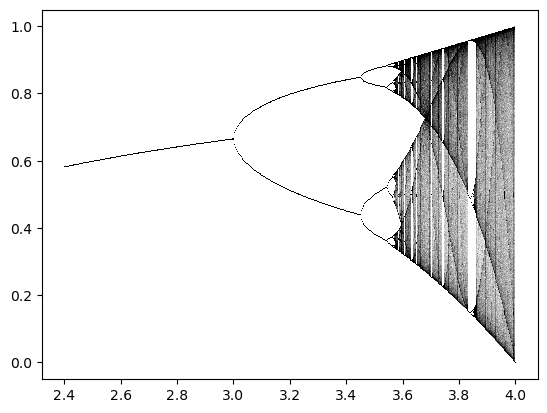

In [5]:
for i in range(len(param_values)):
    plt.plot(param_values[i] * np.ones_like(bd[0]), bd[i], 'ko', markersize=0.1, markeredgewidth=0)

In [6]:
parameters = np.array([3.5])
ds.period(u, max_time=10000, parameters=parameters, transient_time=5000)

4

# Dissipative asymmetric kicked rotor

In [7]:
@njit
def dakrm(u, parameters):
    k, a, gamma = parameters
    x, y = u

    y_new = (1 - gamma) * y + k * (np.sin(x) + a * np.sin(2 * x + np.pi / 2))
    x_new = (x + y_new) % (2 * np.pi)
    return np.array([x_new, y_new])

@njit
def dakrm_jacobian(u, parameters, *args):
    k, a, gamma = parameters
    x, y = u

    dFdx = k * (np.cos(x) + 2 * a * np.cos(2 * x + np.pi / 2))
    dFdy = 1 - gamma

    return np.array([
        [1 + dFdx, dFdy],
        [dFdx,     dFdy]
    ])

In [8]:
ds = dds(mapping=dakrm, jacobian=dakrm_jacobian, system_dimension=2, number_of_parameters=3)

In [9]:
u = np.array([1.78, 0.0])
parameters = np.array([15, 0.40, 0.8])
total_time = 10000
transient_time = 5000
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time), ds.period(u, total_time, parameters=parameters, transient_time=transient_time)

(array([-0.09148231, -1.5179556 ]), 2)